In [51]:
import pylab
import numpy as np
from qiskit import Aer, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.utils import QuantumInstance
from qiskit.tools.visualization import plot_histogram
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit import Parameter
from qiskit.circuit.library.phase_oracle import PhaseOracle

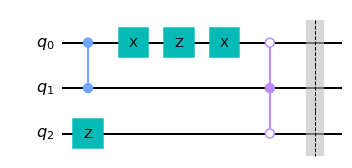

In [59]:
import os
import tempfile
from qiskit.exceptions import MissingOptionalLibraryError

input_sat_instance = '''
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''
n = 3

fp = tempfile.NamedTemporaryFile(mode='w+t', delete=False)
fp.write(input_sat_instance)
file_name = fp.name
fp.close()
oracle = None
try:
    oracle = PhaseOracle.from_dimacs_file(file_name)
except MissingOptionalLibraryError as ex:
    print(ex)
finally:
    os.remove(file_name)
oracle.barrier()
oracle.draw('mpl')


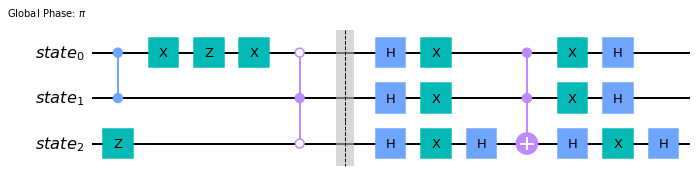

In [60]:
from qiskit.algorithms import AmplificationProblem

problem = None
if oracle is not None:
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
problem.grover_operator.decompose().draw('mpl')

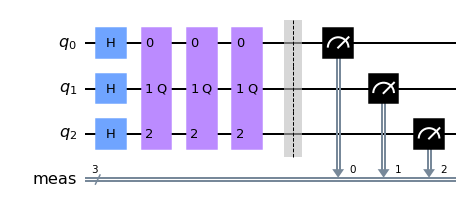

In [61]:
from qiskit.algorithms import Grover
from qiskit.primitives import Sampler
import math

grover = Grover(sampler=Sampler())
qc = grover.construct_circuit(problem, power=3)
qc.measure_all(c_x)
qc.draw('mpl')

In [55]:
from qiskit import Aer, transpile

backend_sim = Aer.get_backend('qasm_simulator')

job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1000)

result_sim = job_sim.result()
counts = result_sim.get_counts()
print(counts)

{'101': 329, '000': 317, '011': 341, '010': 6, '110': 4, '111': 1, '001': 2}


In [56]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def binary(x, length):
    if x == 0:
        return '0' * length
    return binary(x//2, length-1) + str(x % 2)

[Text(0, 0, '000'),
 Text(1, 0, '001'),
 Text(2, 0, '010'),
 Text(3, 0, '011'),
 Text(4, 0, '100'),
 Text(5, 0, '101'),
 Text(6, 0, '110'),
 Text(7, 0, '111')]

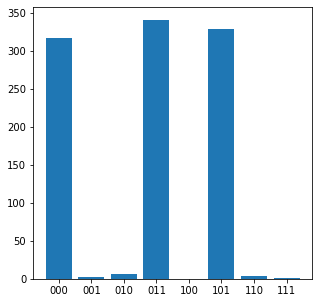

In [57]:

# x, y: position
x = list(range(2 ** n))
x_tickets = [binary(_x, n) for _x in x]

zz = np.zeros([len(x)])
for _i, i in enumerate(x):
    k = binary(i, n)
    zz[_i] += counts[k] if k in counts.keys() else 0

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.bar(x, zz)
ax.set_xticks(x)
ax.set_xticklabels(x_tickets)
